In [78]:
# Import des packages nécessaires
using XLSX, DataFrames, Plots, Statistics

# df_DCA_l2 =  DataFrame(XLSX.readtable("L2/results_A_IEEE_6bus_DCA_l2_2_100_1.5_1.0.xlsx", "results"))
# df_GRB_l2 =  DataFrame(XLSX.readtable("L2/results_A_IEEE_6bus_GRB_l2_2_100_1.5_1.0.xlsx", "results"))
# df_GRB_l1 =  DataFrame(XLSX.readtable("L1/results_A_IEEE_6bus_GRB_l1_2_100_4.5_1.0.xlsx", "results"))
# df_DCA_l1 = DataFrame(XLSX.readtable("L1/results_A_IEEE_6bus_DCA_l1_2_100_4.5_1.0.xlsx", "results"))


force = 1.0
df_risk_neutral =  DataFrame(XLSX.readtable("SP/results_A_IEEE_118_syst_35_100_$(force).xlsx", "results"))
df_DCA_l2 =  DataFrame(XLSX.readtable("L2/results_A_IEEE_118_syst_DCA_l2_35_100_1.7_$(force).xlsx", "results"))
df_DCA_l1 =  DataFrame(XLSX.readtable("L1/results_A_IEEE_118_syst_DCA_l1_35_100_8.0_$(force).xlsx", "results"))
df_GRB_l1 =  DataFrame(XLSX.readtable("L1/results_A_IEEE_118_syst_Grb_l1_35_100_8.0_$(force).xlsx", "results"))
df_KL_07 =  DataFrame(XLSX.readtable("KL/results_A_IEEE_118_syst_KL_35_100_0.9_$(force).xlsx", "results0.7"))
df_KL_08 =  DataFrame(XLSX.readtable("KL/results_A_IEEE_118_syst_KL_35_100_0.9_$(force).xlsx", "results0.8"))
df_KL_09 =  DataFrame(XLSX.readtable("KL/results_A_IEEE_118_syst_KL_35_100_0.9_$(force).xlsx", "results0.9"))
df_AVAR_07 =  DataFrame(XLSX.readtable("AVAR/results_A_IEEE_118_syst_AVAR_35_100_0.9_$(force).xlsx", "results0.7"))
df_AVAR_08 =  DataFrame(XLSX.readtable("AVAR/results_A_IEEE_118_syst_AVAR_35_100_0.9_$(force).xlsx", "results0.8"))
df_AVAR_09 =  DataFrame(XLSX.readtable("AVAR/results_A_IEEE_118_syst_AVAR_35_100_0.9_$(force).xlsx", "results0.9"))

df_list = [df_risk_neutral, df_DCA_l2, df_DCA_l1, df_GRB_l1, df_KL_07, df_KL_08, df_KL_09, df_AVAR_07, df_AVAR_08, df_AVAR_09]
labels = ["Risk Neutral", "DCA L2", "DCA L1", "GRB L1", "KL 0.7", "KL 0.8", "KL 0.9", "AVAR 0.7", "AVAR 0.8", "AVAR 0.9"]

# df_list = [df_DCA_l2, df_GRB_l2, df_GRB_l1, df_DCA_l1]
# labels = ["DCA L2", "GRB L2", "GRB L1", "DCA L1"]

10-element Vector{String}:
 "Risk Neutral"
 "DCA L2"
 "DCA L1"
 "GRB L1"
 "KL 0.7"
 "KL 0.8"
 "KL 0.9"
 "AVAR 0.7"
 "AVAR 0.8"
 "AVAR 0.9"

In [90]:
df_DCA_l1

Row,Instance,S,batch,radius,Temps,OOS,UB,LB,force
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,IEEE254,10,1,8.0,67.217,1.59103e6,1.58344e6,1.58243e6,1.0
2,IEEE254,10,2,8.0,57.2487,1.59293e6,1.58479e6,1.58321e6,1.0
3,IEEE254,10,3,8.0,91.3926,1.58756e6,1.5836e6,1.58253e6,1.0
4,IEEE254,10,4,8.0,106.807,1.58436e6,1.58537e6,1.58417e6,1.0
5,IEEE254,10,5,8.0,84.9331,1.58419e6,1.58664e6,1.58556e6,1.0
6,IEEE254,10,6,8.0,90.214,1.58679e6,1.58682e6,1.58573e6,1.0
7,IEEE254,10,7,8.0,89.8362,1.58633e6,1.58469e6,1.58383e6,1.0
8,IEEE254,10,8,8.0,109.289,1.58574e6,1.58666e6,1.58559e6,1.0
9,IEEE254,10,9,8.0,62.2734,1.59075e6,1.58602e6,1.58444e6,1.0


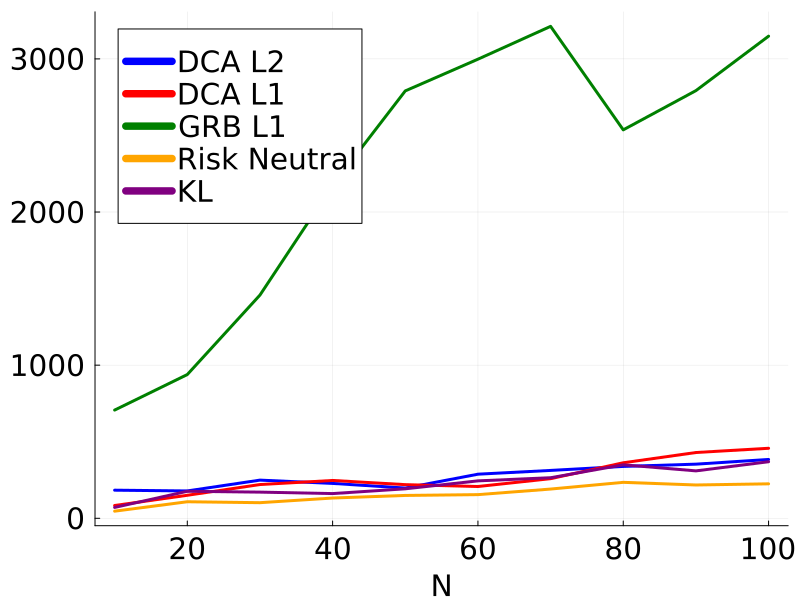

In [60]:
# Calculer le temps moyen par nombre de scénarios pour toutes les méthodes
colors = [:blue, :red, :green, :orange, :purple]
p = nothing

for (i, (df, label)) in enumerate(zip(df_list, labels))
    # Grouper par nombre de scénarios et calculer la moyenne des temps
    grouped_data = groupby(df, :S)
    mean_times = combine(grouped_data, :Temps => mean => :MeanTime)
    
    # Trier par nombre de scénarios
    sort!(mean_times, :S)
    
    if i == 1
        # Créer le premier graphique
        p = plot(mean_times.S, mean_times.MeanTime,  
                linewidth=3, 
                markersize=6,
                xlabel="N", 
                titlefontsize=24, 
                guidefontsize=20, 
                tickfontsize=20, 
                legendfontsize=20,
            #     yscale = :log10,
                grid=true,
                label=label,
                color=colors[i],
                size=(800, 600))
    else
        # Ajouter les autres courbes
        plot!(mean_times.S, mean_times.MeanTime,  
              linewidth=3, 
              markersize=6,
              label=label,
              color=colors[i])
    end
end

p
# savefig("time_comparison_DCA.png")  # Enregistrer le graphique

DCA L1
10×4 DataFrame
 Row │ S    MeanOOS    StdOOS    Count 
     │ Any  Float64    Float64   Int64 
─────┼─────────────────────────────────
   1 │ 10   1.58744e6  3089.79      10
   2 │ 20   1.58434e6  1395.66      10
   3 │ 30   1.58358e6   763.305     10
   4 │ 40   1.58325e6   392.188     10
   5 │ 50   1.58337e6   621.958     10
   6 │ 60   1.58342e6   542.368     10
   7 │ 70   1.58323e6   611.248     10
   8 │ 80   1.58323e6   471.014     10
   9 │ 90   1.58314e6   514.213     10
  10 │ 100  1.5829e6    537.911     10


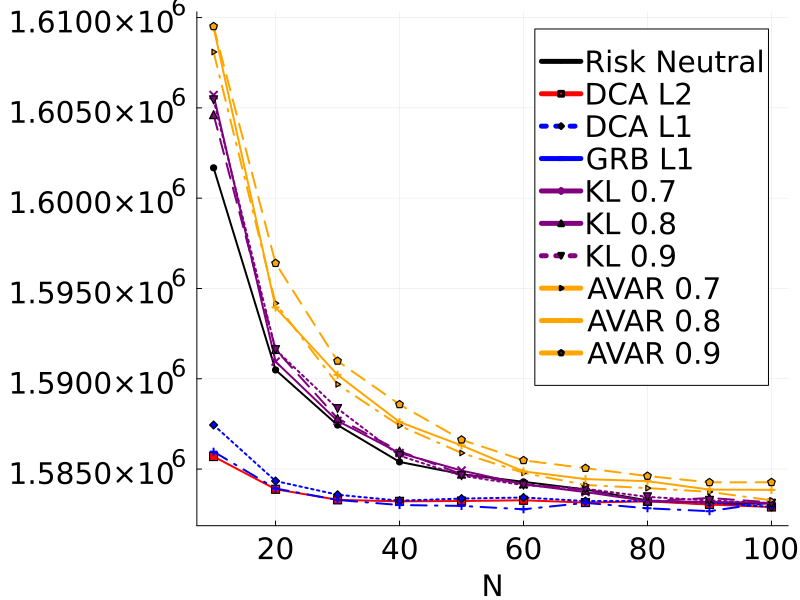

In [99]:
# Calculer la moyenne OOS pour toutes les méthodes
colors = [:black, :red, :blue, :blue, :purple, :purple, :purple, :orange, :orange, :orange]
linestyles = [:solid, :solid, :dot, :dashdot, :solid, :dash, :dot, :dashdot, :solid, :dash]
markers = [:circle, :square, :diamond, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :cross, :pentagon]
p = nothing

for (i, (df, label)) in enumerate(zip(df_list, labels))
    # Calculer la moyenne OOS et l'écart-type par nombre de scénarios
    grouped_data_oos = groupby(df, :S)
    mean_oos = combine(grouped_data_oos, 
                       :OOS => mean => :MeanOOS,
                       :OOS => std => :StdOOS,
                       :OOS => length => :Count)
    
    # Trier par nombre de scénarios
    sort!(mean_oos, :S)

    if label == "DCA L1"
        println(label)
        println(mean_oos)
    end
    
    if i == 1
        # Créer le premier graphique
        p = plot(mean_oos.S, mean_oos.MeanOOS,  
                linewidth=2, 
                markersize=4,
                markerstrokewidth=1,
                marker=markers[i],
                linestyle=linestyles[i],
                xlabel="N",  
                titlefontsize=24, 
                guidefontsize=20, 
                tickfontsize=20, 
                legendfontsize=20,
                grid=true,
                label=label,
                color=colors[i],
                size=(800, 600),
                legend=:topright,
                legend_font_pointsize=16)
    else
        # Ajouter les autres courbes
        plot!(mean_oos.S, mean_oos.MeanOOS,  
              linewidth=2, 
              markersize=4,
              markerstrokewidth=1,
              marker=markers[i],
              linestyle=linestyles[i],
              label=label,
              color=colors[i])
    end
end

# Ajouter la courbe constante Det (optionnel)
# plot!(mean_oos.S, fill(1.5790241182171172e6, length(mean_oos.S)), 
#       linewidth=3, 
#       color=:black, 
#       linestyle=:dash, 
#       label="Det")

p
# savefig("OOS_DCA.png")  # Enregistrer le graphique
